In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import ExtraTreesRegressor

In [37]:
df = pd.read_csv("C:/Users/natas/OneDrive/Documents/UCD/Sem 3/TruthSeeker2023/Features_For_Traditional_ML_Techniques.csv")

In [38]:
df

,Unnamed: 0,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,...,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
0,0,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,4262.0,3619.0,34945.0,16423.0,44.0,...,0,0,5,0,1,0,33,3,5,19
1,1,True,End of eviction moratorium means millions of A...,1.0,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1393.0,1621.0,31436.0,37184.0,64.0,...,0,2,1,0,0,0,14,0,2,34
2,2,True,End of eviction moratorium means millions of A...,1.0,THE SUPREME COURT is siding with super rich pr...,9.0,84.0,219.0,1184.0,0.0,...,0,1,0,0,0,0,3,0,4,10
3,3,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders\n\nBroken campaign promi...,4262.0,3619.0,34945.0,16423.0,44.0,...,0,1,3,0,0,1,6,8,1,30
4,4,True,End of eviction moratorium means millions of A...,1.0,@OhComfy I agree. The confluence of events rig...,70.0,166.0,15282.0,2194.0,0.0,...,0,1,3,0,1,0,11,3,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134193,134193,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,Joe Biden's family owned African slaves....\n\...,2075.0,2662.0,156306.0,62375.0,3.0,...,0,2,1,0,3,0,31,0,4,32
134194,134194,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,"Joe Bidens great, great grandfather was a slav...",1636.0,1626.0,215290.0,44011.0,10.0,...,0,0,1,0,0,0,16,6,2,8
134195,134195,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,"@ChevyChaseToGo ""Joe Bidens great-grandfather ...",286.0,2501.0,28377.0,7617.0,1.0,...,1,4,1,0,0,1,2,4,0,37
134196,134196,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,@JoeBiden Facts are Bidens VP Kamala Harris Gr...,2.0,45.0,16.0,509.0,0.0,...,1,0,3,0,0,0,0,0,1,11


In [39]:
df.columns

Index(['Unnamed: 0', 'majority_target', 'statement', 'BinaryNumTarget',
       'tweet', 'followers_count', 'friends_count', 'favourites_count',
       'statuses_count', 'listed_count', 'following', 'embeddings', 'BotScore',
       'BotScoreBinary', 'cred', 'normalize_influence', 'mentions', 'quotes',
       'replies', 'retweets', 'favourites', 'hashtags', 'URLs', 'unique_count',
       'total_count', 'ORG_percentage', 'NORP_percentage', 'GPE_percentage',
       'PERSON_percentage', 'MONEY_percentage', 'DATE_percentage',
       'CARDINAL_percentage', 'PERCENT_percentage', 'ORDINAL_percentage',
       'FAC_percentage', 'LAW_percentage', 'PRODUCT_percentage',
       'EVENT_percentage', 'TIME_percentage', 'LOC_percentage',
       'WORK_OF_ART_percentage', 'QUANTITY_percentage', 'LANGUAGE_percentage',
       'Word count', 'Max word length', 'Min word length',
       'Average word length', 'present_verbs', 'past_verbs', 'adjectives',
       'adverbs', 'adpositions', 'pronouns', 'TOs', 'deter

In [40]:
num_c = df.select_dtypes(include=np.number).columns.tolist()
cat_c = df.select_dtypes(include="object").columns.tolist()
print("List of numerical colums:",num_c)
print("List of categorical colums:",cat_c)

List of numerical colums: ['Unnamed: 0', 'BinaryNumTarget', 'followers_count', 'friends_count', 'favourites_count', 'statuses_count', 'listed_count', 'following', 'BotScore', 'BotScoreBinary', 'cred', 'normalize_influence', 'mentions', 'quotes', 'replies', 'retweets', 'favourites', 'hashtags', 'URLs', 'unique_count', 'total_count', 'ORG_percentage', 'NORP_percentage', 'GPE_percentage', 'PERSON_percentage', 'MONEY_percentage', 'DATE_percentage', 'CARDINAL_percentage', 'PERCENT_percentage', 'ORDINAL_percentage', 'FAC_percentage', 'LAW_percentage', 'PRODUCT_percentage', 'EVENT_percentage', 'TIME_percentage', 'LOC_percentage', 'WORK_OF_ART_percentage', 'QUANTITY_percentage', 'LANGUAGE_percentage', 'Word count', 'Max word length', 'Min word length', 'Average word length', 'present_verbs', 'past_verbs', 'adjectives', 'adverbs', 'adpositions', 'pronouns', 'TOs', 'determiners', 'conjunctions', 'dots', 'exclamation', 'questions', 'ampersand', 'capitals', 'digits', 'long_word_freq', 'short_word_

In [41]:
df['embeddings']

0         [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
1         [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
2         [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
3         [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
4         [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
                          ...                  
134193    [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
134194    [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
134195    [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
134196    [[0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1]]
134197    [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Name: embeddings, Length: 134198, dtype: object

In [65]:
df.isna().any()

friends_count             False
favourites_count          False
statuses_count            False
listed_count              False
following                 False
BotScore                  False
BotScoreBinary            False
cred                      False
normalize_influence       False
mentions                  False
quotes                    False
replies                   False
retweets                  False
favourites                False
hashtags                  False
URLs                      False
unique_count              False
total_count               False
ORG_percentage            False
NORP_percentage           False
GPE_percentage            False
PERSON_percentage         False
MONEY_percentage          False
DATE_percentage           False
CARDINAL_percentage       False
PERCENT_percentage        False
ORDINAL_percentage        False
FAC_percentage            False
LAW_percentage            False
PRODUCT_percentage        False
EVENT_percentage          False
TIME_per

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,134198.0,67098.500000,38739.770050,0.0,33549.250000,67098.500000,100647.750000,1.341970e+05
BinaryNumTarget,134198.0,0.513644,0.499816,0.0,0.000000,1.000000,1.000000,1.000000e+00
followers_count,134198.0,11293.082103,437497.073676,0.0,70.000000,354.000000,1573.000000,1.306019e+08
friends_count,134198.0,1893.454455,6997.695671,0.0,168.000000,567.000000,1726.000000,5.869010e+05
favourites_count,134198.0,32981.233878,68780.210325,0.0,1356.000000,8377.000000,33526.500000,1.765080e+06
statuses_count,134198.0,34195.761449,75101.195265,1.0,3046.000000,11019.000000,33573.750000,2.958918e+06
listed_count,134198.0,73.300198,1083.274277,0.0,0.000000,2.000000,11.000000,2.221930e+05
following,134198.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00
BotScore,134198.0,0.059106,0.167819,0.0,0.030000,0.030000,0.030000,1.000000e+00
BotScoreBinary,134198.0,0.032355,0.176942,0.0,0.000000,0.000000,0.000000,1.000000e+00


In [43]:
y = df.pop('BinaryNumTarget').values

In [44]:
df.pop('Unnamed: 0')
df.pop('statement')
df.pop('tweet')
df.pop('majority_target')
df.pop('embeddings')
df.pop('followers_count')

0         4262.0
1         1393.0
2            9.0
3         4262.0
4           70.0
           ...  
134193    2075.0
134194    1636.0
134195     286.0
134196       2.0
134197     178.0
Name: followers_count, Length: 134198, dtype: float64

<AxesSubplot:>

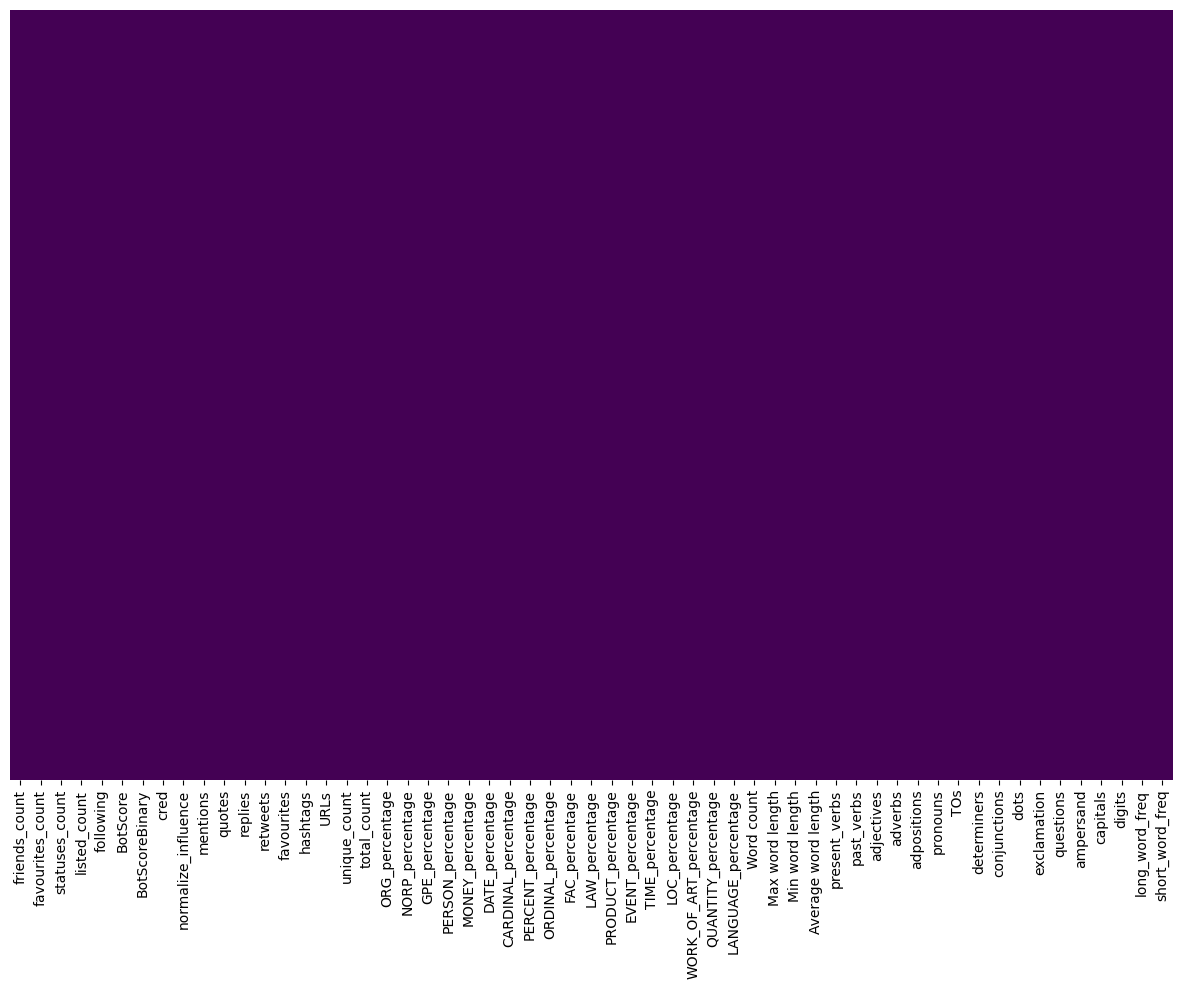

In [64]:
plt.figure(2, figsize = [15,10])
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

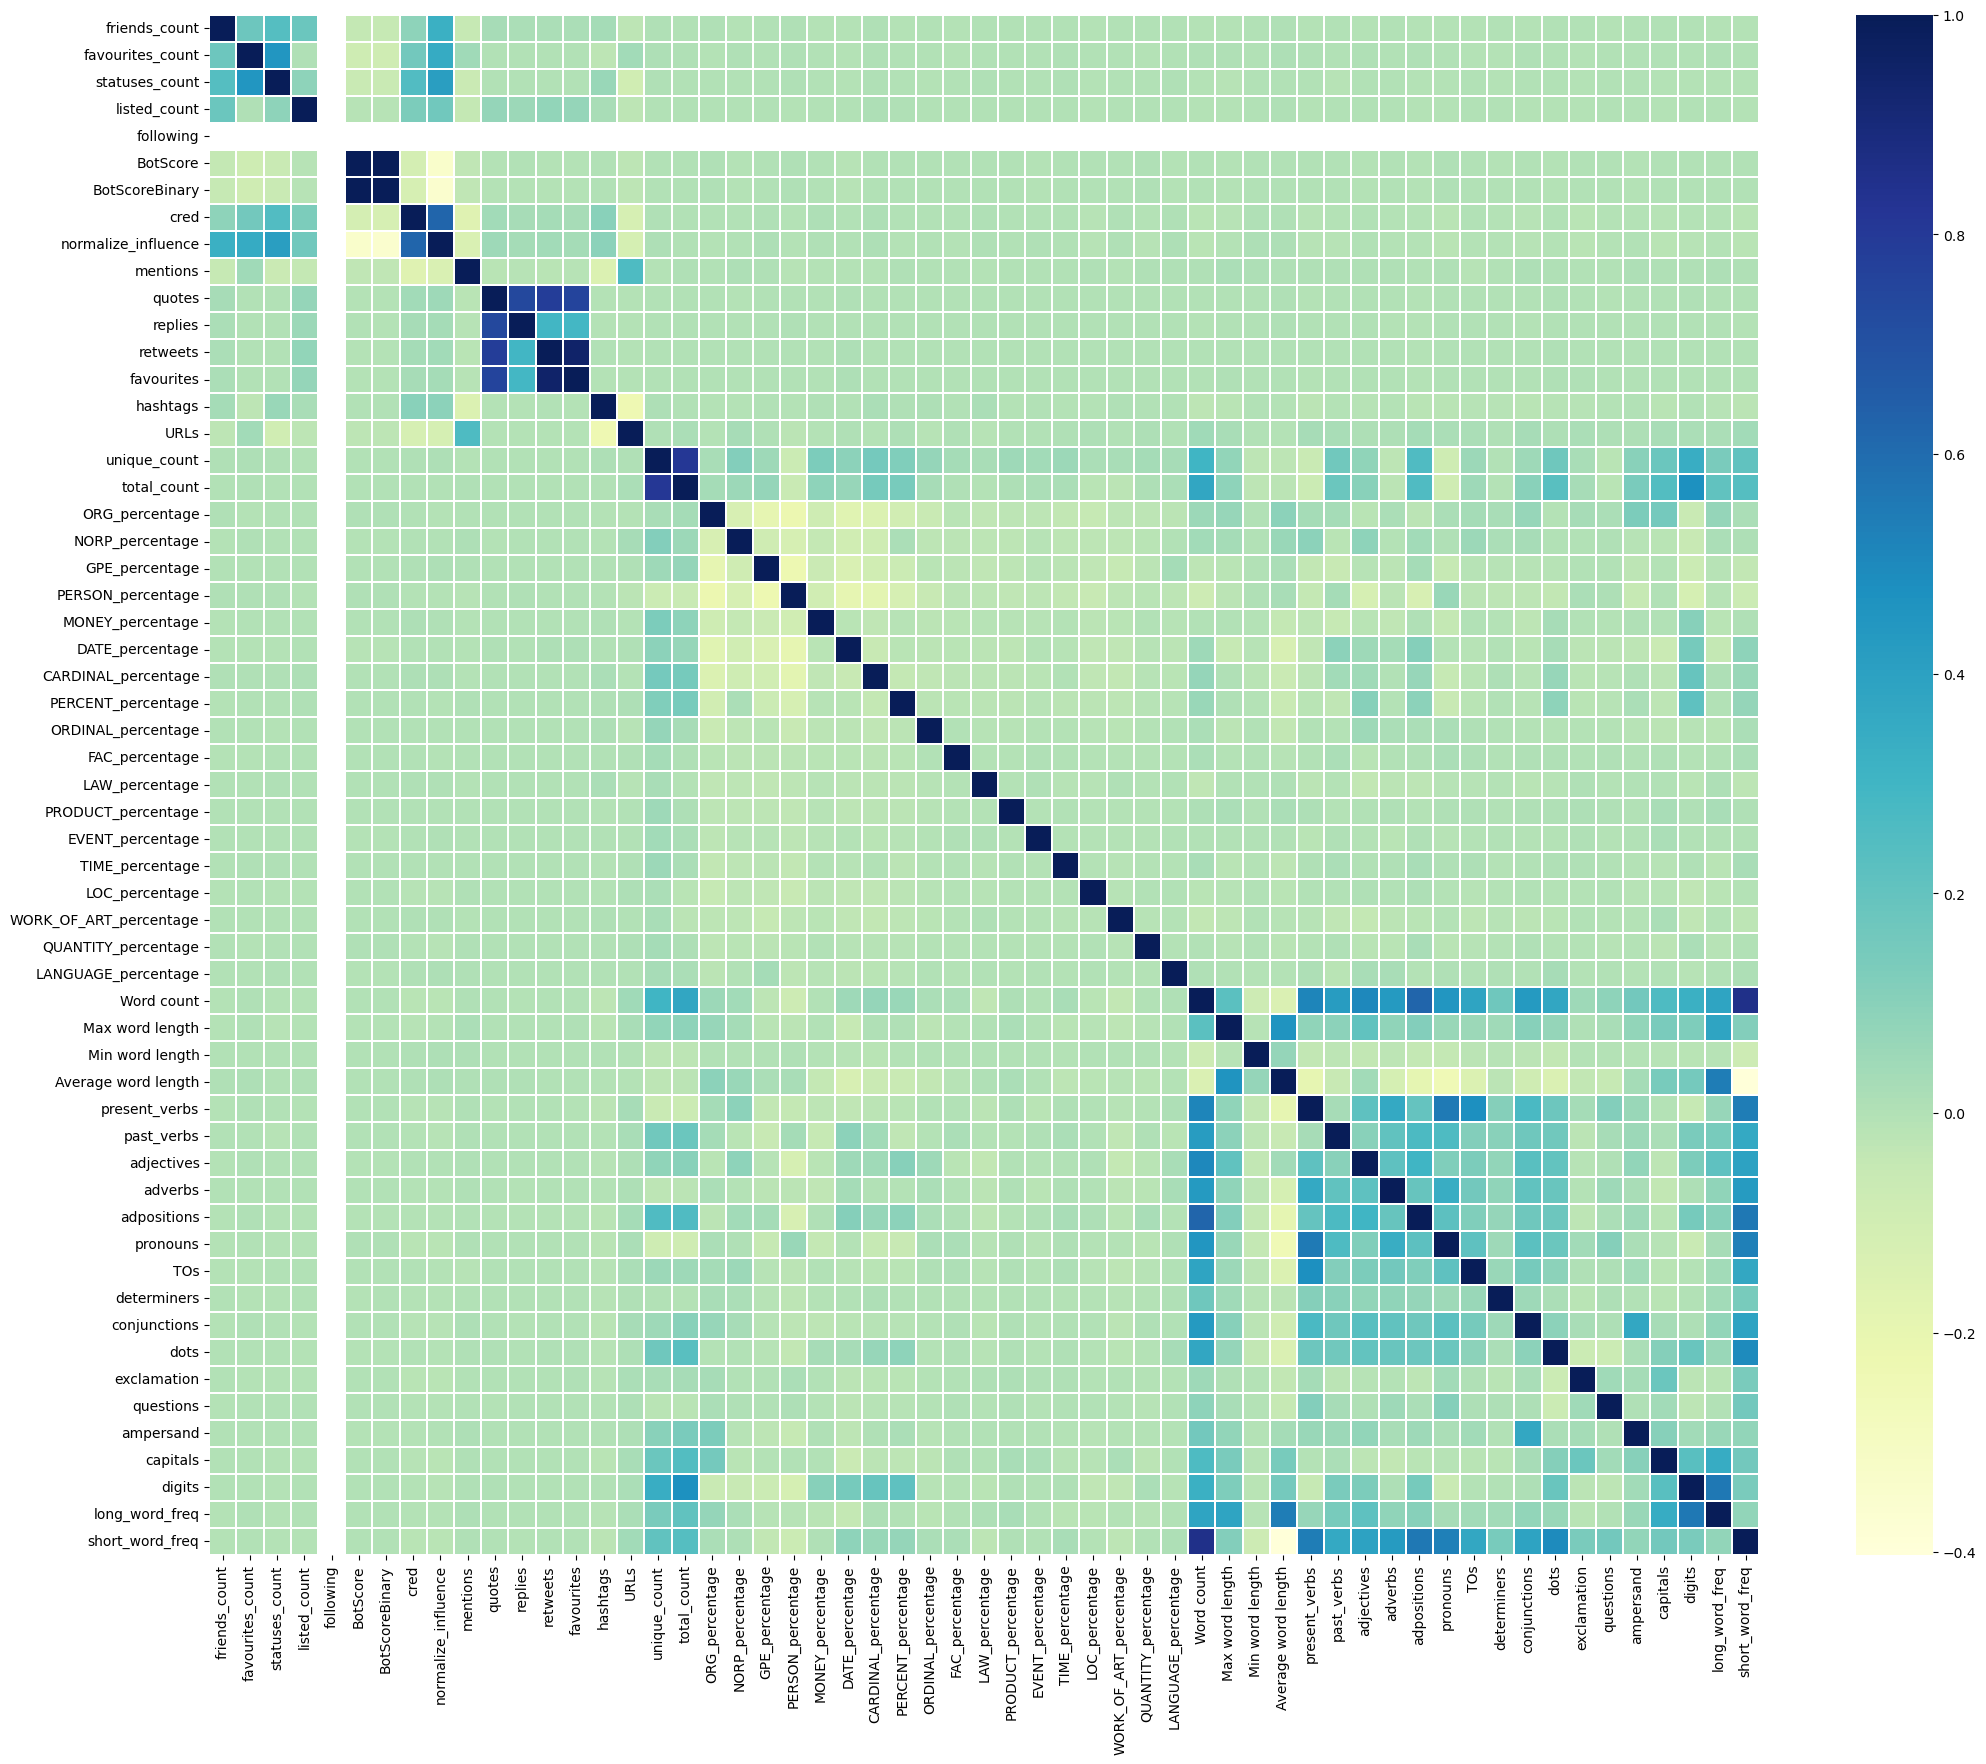

In [80]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize =(25, 20))
sns.heatmap(corr_matrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [71]:
X = df.values
df.shape

(134198, 57)

## mutual_info_classif (I-gain)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
mnb = GaussianNB()

In [48]:
mi = dict()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=1/2)

In [49]:
i_scores = mutual_info_classif(X_train, y_train)

In [50]:
for i,j in zip(df.columns,i_scores):
    mi[i]=j

In [51]:
df1 = pd.DataFrame.from_dict(mi,orient='index',columns=['I-Gain'])
df1.sort_values(by=['I-Gain'],ascending=False,inplace=True)
df1.head(-5)

,I-Gain
normalize_influence,0.065632
statuses_count,0.057316
cred,0.056684
favourites_count,0.050884
friends_count,0.024058
URLs,0.018004
listed_count,0.015934
present_verbs,0.008973
pronouns,0.008570
Average word length,0.007231


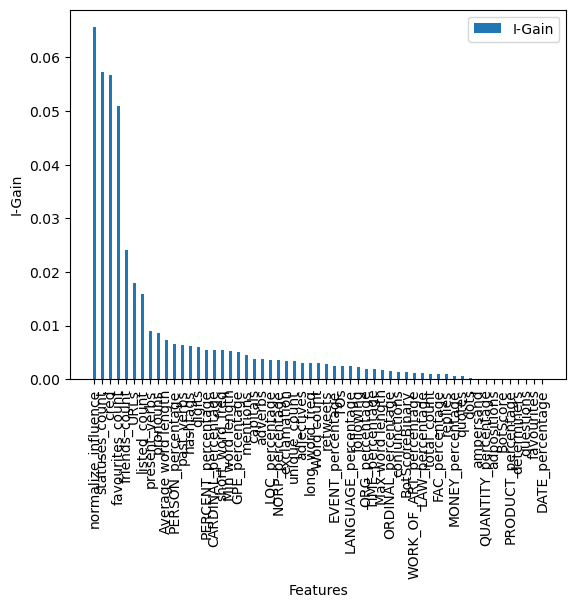

In [52]:
n = len(df.index)
rr = range(1,n)
fig, ax = plt.subplots()
ax.bar(df1.index, df1["I-Gain"], label='I-Gain',width=.35)
ax.set_xticks(list(df1.index))
ax.set_xticklabels(list(df1.index), rotation = 90)
ax.set_xlabel('Features')
ax.set_ylabel('I-Gain')
ax.legend()

plt.show()

In [53]:
acc_scores = []
for kk in range(1, X.shape[1]+1):
    FS_trans = SelectKBest(mutual_info_classif, 
                           k=kk).fit(X_train, y_train)
    X_tR_new = FS_trans.transform(X_train)
    X_tS_new = FS_trans.transform(X_test)
    seg_NB = mnb.fit(X_tR_new, y_train)
    y_dash = seg_NB.predict(X_tS_new)
    acc = accuracy_score(y_test, y_dash)
    acc_scores.append(acc)

In [54]:
df1['Accuracy'] = acc_scores
df1.head(10)

,I-Gain,Accuracy
normalize_influence,0.065632,0.553108
statuses_count,0.057316,0.508473
cred,0.056684,0.508636
favourites_count,0.050884,0.509903
friends_count,0.024058,0.509113
URLs,0.018004,0.505775
listed_count,0.015934,0.505775
present_verbs,0.008973,0.505626
pronouns,0.008570,0.506088
Average word length,0.007231,0.506938


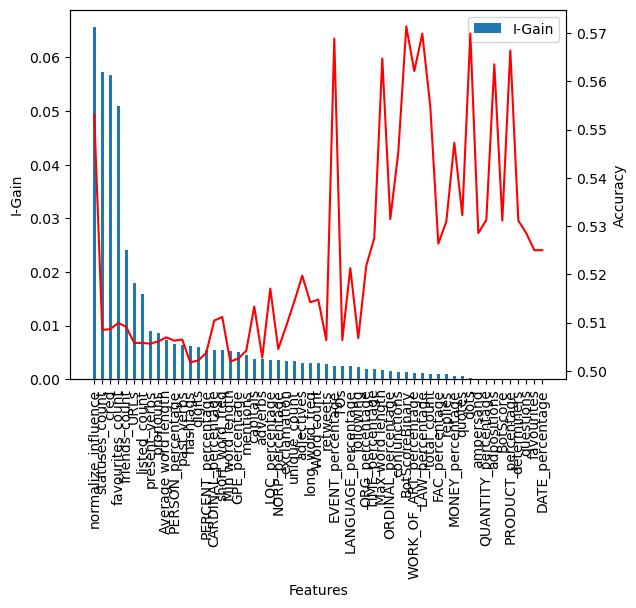

In [85]:
n = len(df1.index)
rr = range(1,n)
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(df1.index, df1["I-Gain"], label='I-Gain',width=.35)
ax2.plot(df1.index, df1["Accuracy"], color='red', label='Accuracy')
ax.set_xticks(list(df1.index))
ax.set_xticklabels(list(df1.index), rotation = 90)
ax.set_xlabel('Features')
ax.set_ylabel('I-Gain')
ax2.set_ylabel('Accuracy')
ax.legend()

plt.show()

## ExtraTreesRegressor

In [59]:
X=pd.DataFrame(df_reg,columns={'friends_count', 'favourites_count', 'statuses_count', 'listed_count', 'following', 'BotScore', 'BotScoreBinary', 'cred', 'normalize_influence', 'mentions', 'quotes', 'replies', 'retweets', 'favourites', 'hashtags', 'URLs', 'unique_count', 'total_count', 'ORG_percentage', 'NORP_percentage', 'GPE_percentage', 'PERSON_percentage', 'MONEY_percentage', 'DATE_percentage', 'CARDINAL_percentage', 'PERCENT_percentage', 'ORDINAL_percentage', 'FAC_percentage', 'LAW_percentage', 'PRODUCT_percentage', 'EVENT_percentage', 'TIME_percentage', 'LOC_percentage', 'WORK_OF_ART_percentage', 'QUANTITY_percentage', 'LANGUAGE_percentage', 'Word count', 'Max word length', 'Min word length', 'Average word length', 'present_verbs', 'past_verbs', 'adjectives', 'adverbs', 'adpositions', 'pronouns', 'TOs', 'determiners', 'conjunctions', 'dots', 'exclamation', 'questions', 'ampersand', 'capitals', 'digits', 'long_word_freq', 'short_word_freq'})
Y=pd.DataFrame(df_reg,columns={'BinaryNumTarget'})

In [67]:
#handling overfitting and improve accuracy
model=ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor()

In [68]:
print(model.feature_importances_)

[0.02170391 0.02529414 0.02311833 0.02728582 0.         0.00618664
 0.00244444 0.02933523 0.02902262 0.02396954 0.00499159 0.0171139
 0.00970097 0.01820249 0.01303959 0.01925845 0.01812654 0.02009276
 0.02050353 0.0157258  0.01887071 0.02797391 0.01199717 0.01881029
 0.01673032 0.01223085 0.00694229 0.0027405  0.00394931 0.00464899
 0.00250173 0.00510691 0.00641575 0.00597189 0.00287921 0.00110795
 0.03023062 0.02638289 0.01748222 0.02836358 0.02741165 0.03157881
 0.0298541  0.02468577 0.02888439 0.02669753 0.02241344 0.01281571
 0.0234213  0.02599545 0.01552057 0.01795034 0.01067519 0.03009162
 0.02616097 0.02323054 0.02615927]


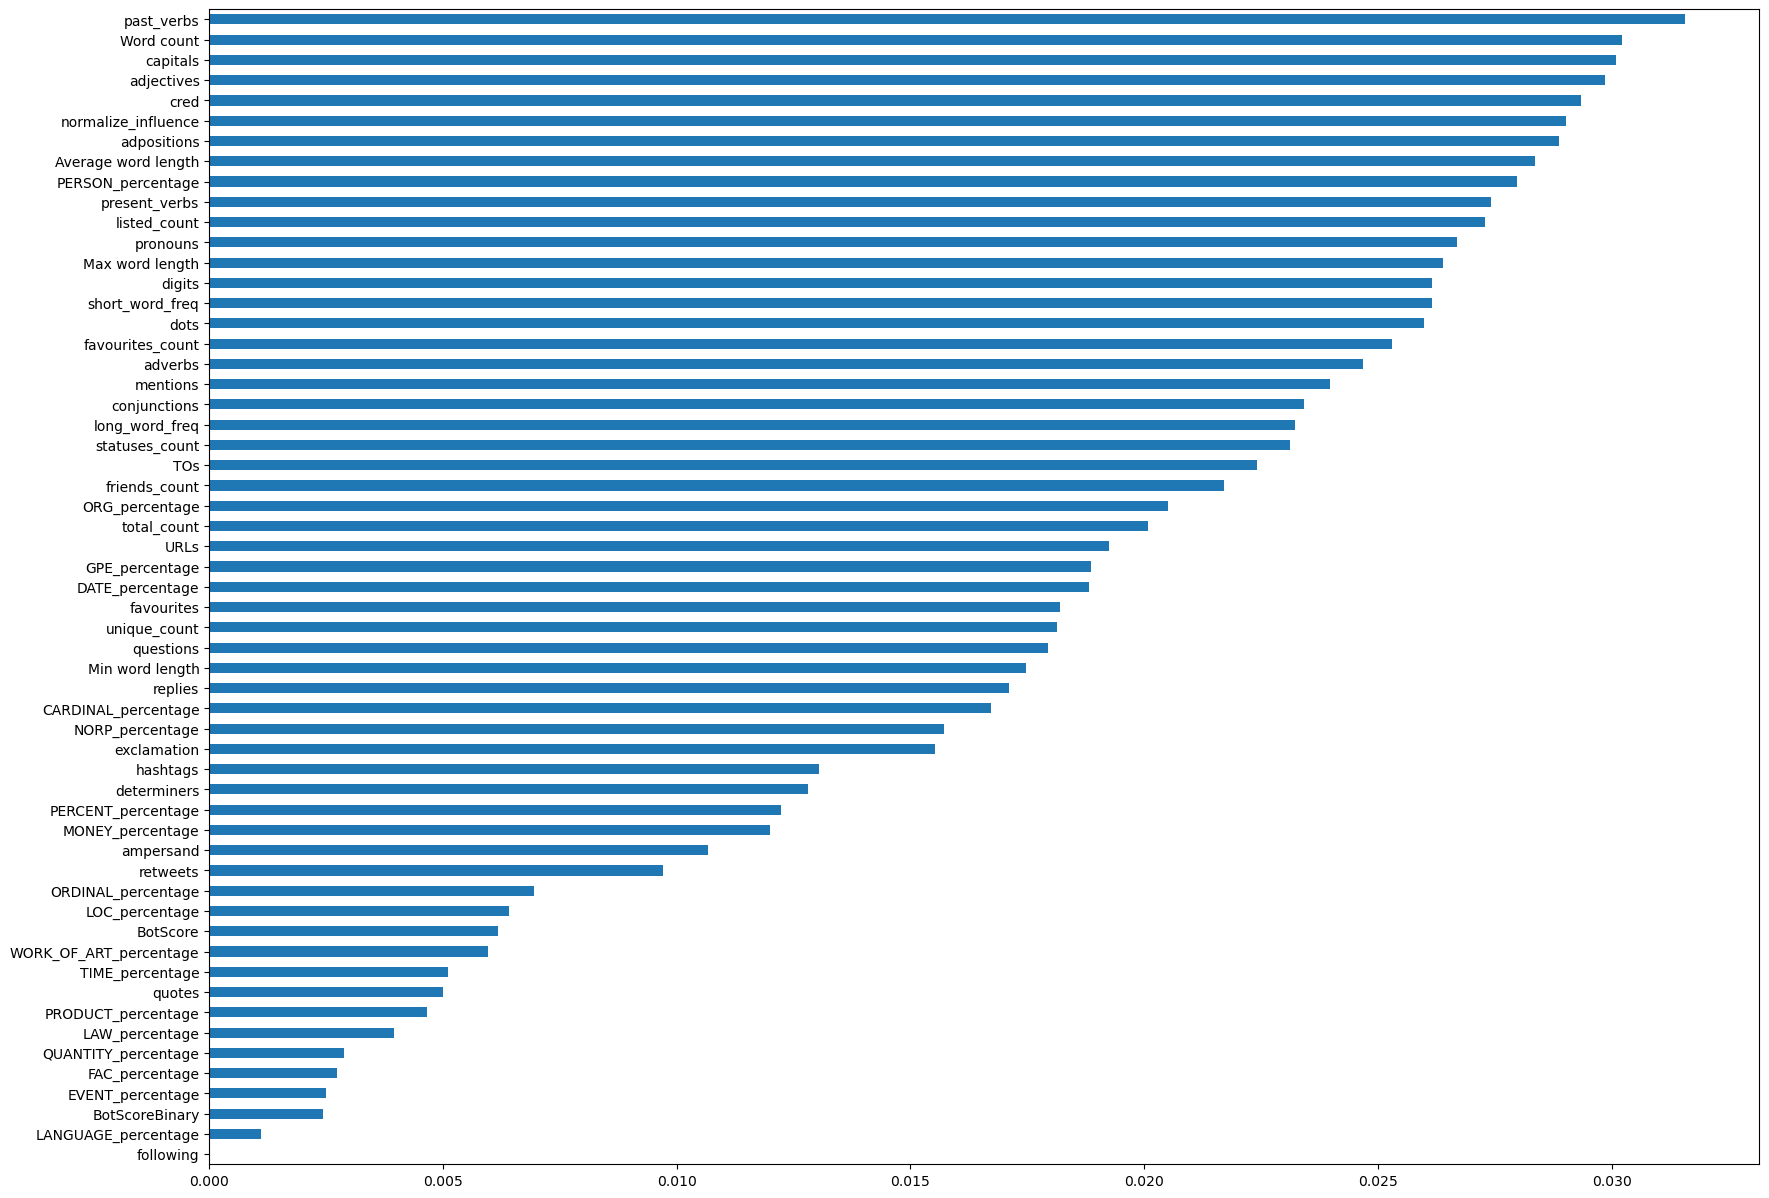

In [78]:
plt.figure(2, figsize = [20,15])
feat_importances = pd.Series(model.feature_importances_, index=df.columns).sort_values()
feat_importances.plot(kind='barh')
feat_importances.plot(kind='barh')
plt.show()